Working sigma 0.1
Working sigma 0.2
Working sigma 0.3
Working sigma 0.4
Working sigma 0.5
Working sigma 0.6
Working sigma 0.7
Working sigma 0.8
Working sigma 0.9
Working sigma 1.0


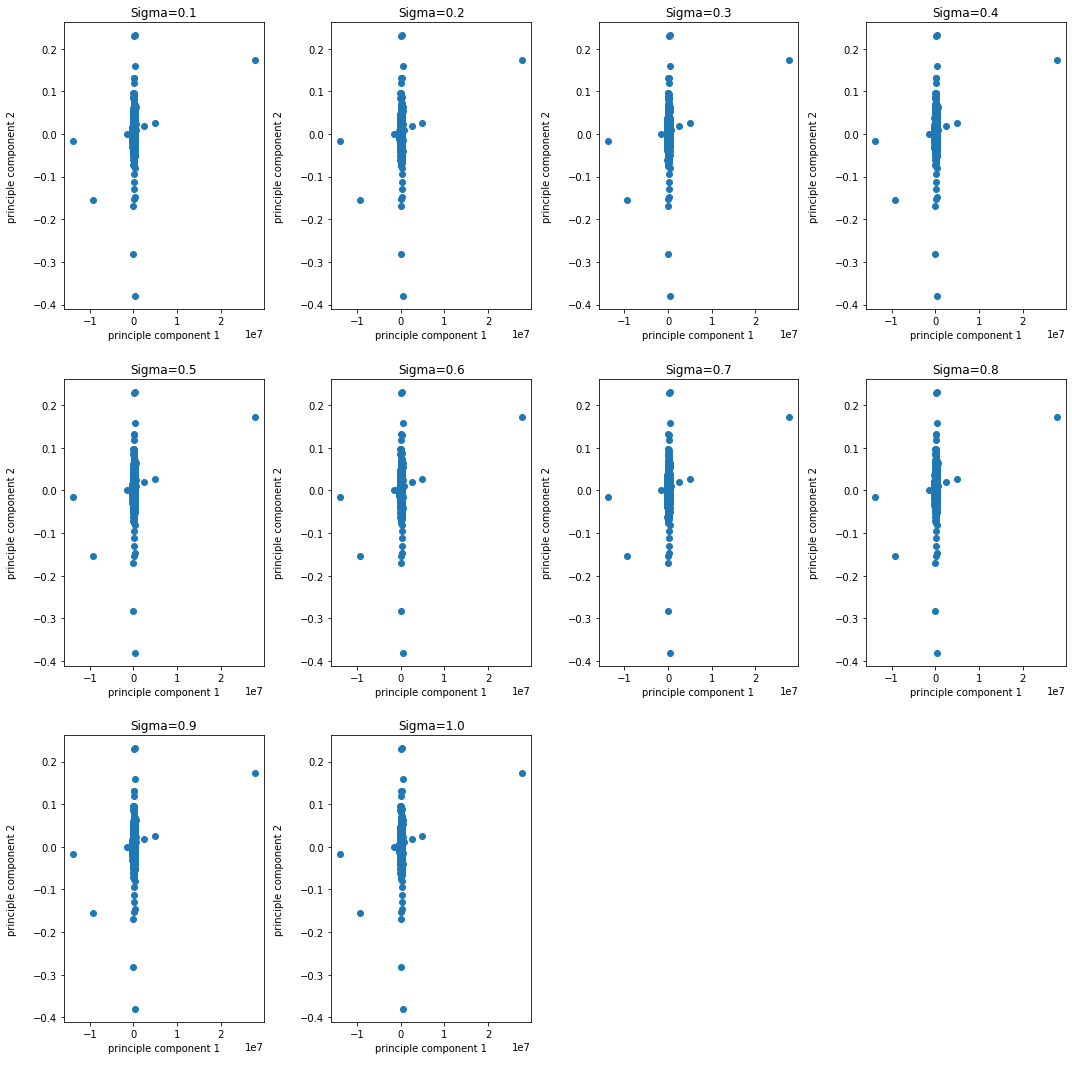

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.values
y = mnist.target.astype(np.uint8)

# Flatten the images
Y= X.reshape(X.shape[0], -1)



subset_size = 1000

# Select a random subset of the data
subset_indices = np.random.choice(70000, subset_size, replace=False)
X= Y[subset_indices]




X = X.T

Size = X.shape[1]

def rbfKernel(x,y,sigma):
    sigma=(2*sigma*sigma)
    return np.exp(-((x-y).transpose())@(x-y)/sigma)

def getKernelComponentsPolynomial(X,sigma):
    
    
    size = X.shape[1]
    N = np.full((size , size), 1/size)
    KernelMatrix = np.zeros((size,size))
    
    for i in range(size):
        for j in range(size):
            KernelMatrix[i,j] = rbfKernel(X[:,i],X[:,j],sigma)

    KernelMatrixCentered = KernelMatrix - N@KernelMatrix - KernelMatrix@N + N@KernelMatrix@N
    eigenValue,eigenVector = np.linalg.eig(KernelMatrixCentered)

    eigenValue=eigenValue.real 
    eigenVector = eigenVector.real

    sortedEigenValues=np.flip(eigenValue.argsort())
    sortedEigenVector = eigenVector[:,sortedEigenValues]
    
    calcLamda=((np.abs(eigenValue))**0.5)
    sortedEigenVector = sortedEigenVector/calcLamda

    kernelSortEV=sortedEigenVector[:,0:2]
    kernelComponent = KernelMatrixCentered.T@(kernelSortEV);
    kernelComponent=kernelComponent.transpose();
                    

    return kernelComponent

 
 

plt.figure(figsize=(15,15))
i=1

def displaySubplot(kernelComponent0,kernelComponent1,sigma):
    plt.tight_layout()
    plt.xlabel('principle component 1\n')
    plt.ylabel('principle component 2\n')
    plt.scatter(kernelComponent0,kernelComponent1)
    plt.title("Sigma="+str(sigma)[:3])

for sigma in np.linspace(0.1,1,10):
    print("Working sigma",str(sigma)[:3])
    plt.subplot(3,4,int(i))
    
    kernelComponent = getKernelComponentsPolynomial(X,sigma)
    displaySubplot(kernelComponent[0],kernelComponent[1],sigma) 
    i+=1
plt.show()